In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [131]:
df = pd.read_csv('housePrice.csv')
df


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61667
1,60,1,True,True,True,Shahran,1850000000,61667
2,79,2,True,True,True,Pardis,550000000,18333
3,95,2,True,True,True,Shahrake Qods,902500000,30083
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116667
3475,83,2,True,True,True,Niavaran,6800000000,226667
3476,75,2,False,False,False,Parand,365000000,12167
3477,105,2,True,True,True,Dorous,5600000000,186667


In [132]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [133]:
df.describe()


,Room,Price,Price(USD)
count,3479,3479,3479
mean,2,5359022711,178634
std,1,8099934524,269998
min,0,3600000,120
25%,2,1418250000,47275
50%,2,2900000000,96667
75%,2,6000000000,200000
max,5,92400000000,3080000


In [134]:
df['Area'] = df['Area'].replace (',' , '')
df['Area']= pd.to_numeric(df['Area'] , errors='coerce')


In [135]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3473 non-null   float64
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 146.2+ KB


In [136]:
df.isna().sum()


Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [137]:
df.dropna(inplace = True)


In [138]:
df.isna().sum()


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64

In [139]:
df['Parking'].value_counts(normalize=True)*100


True    85
False   15
Name: Parking, dtype: float64

In [140]:
df[ df.Area <= 85 ]["Parking"].value_counts( )


True     1104
False     418
Name: Parking, dtype: int64

In [141]:
# df.Address.unique()
len(df.Address.unique())


192

In [142]:
df.groupby( 'Room' )['Price'].mean()


Room
0    7860500000
1    1707480867
2    3322754799
3   10931540411
4   25600328571
5   33734393939
Name: Price, dtype: float64

In [143]:
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df


,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1467853909
5,2,True,3588678643
6,3,False,5107865385
7,3,True,11146619318
8,4,False,6200000000
9,4,True,25881492754


In [144]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
room_parking_room_mean_df = df.groupby( ['Room','Parking'] )['Price'].mean().reset_index()
room_parking_room_mean_df


,Room,Parking,Price
0,0,False,9769750000
1,0,True,223500000
2,1,False,1139677778
3,1,True,2031368545
4,2,False,1467853909
5,2,True,3588678643
6,3,False,5107865385
7,3,True,11146619318
8,4,False,6200000000
9,4,True,25881492754


In [145]:
df2 = df.copy()
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)
df2


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,"1,850,000,000",61667
1,60,1,True,True,True,Shahran,"1,850,000,000",61667
2,79,2,True,True,True,Pardis,"550,000,000",18333
3,95,2,True,True,True,Shahrake Qods,"902,500,000",30083
4,123,2,True,True,True,Shahrake Gharb,"7,000,000,000",233333
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,"3,500,000,000",116667
3475,83,2,True,True,True,Niavaran,"6,800,000,000",226667
3476,75,2,False,False,False,Parand,"365,000,000",12167
3477,105,2,True,True,True,Dorous,"5,600,000,000",186667


In [146]:
df = df.drop(columns = ['Price(USD)'])
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype('int64')

df.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,Shahran,1850000000
1,60,1,1,1,1,Shahran,1850000000
2,79,2,1,1,1,Pardis,550000000
3,95,2,1,1,1,Shahrake Qods,902500000
4,123,2,1,1,1,Shahrake Gharb,7000000000


In [147]:
address_dummy = pd.get_dummies(df['Address'])
df_final = df.merge(address_dummy, left_index = True, right_index = True)
df_final.drop(columns = 'Address', inplace = True)
# df_final.head(3)
df_final


,Area,Room,Parking,Warehouse,Elevator,Price,Abazar,Abbasabad,Absard,Abuzar,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1850000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,550000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,902500000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7000000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3500000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,83,2,1,1,1,6800000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,75,2,0,0,0,365000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,105,2,1,1,1,5600000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 800x500 with 0 Axes>

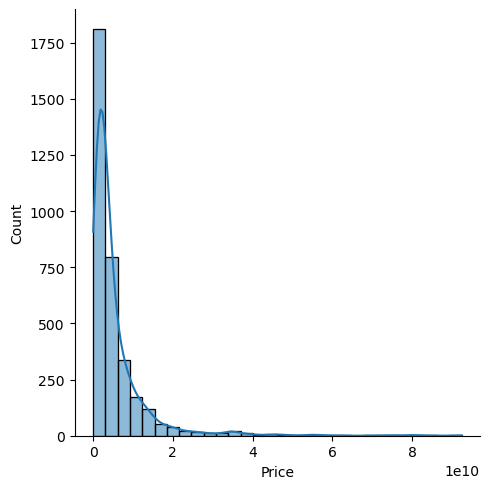

In [148]:
plt.figure(figsize=(8,5))
sns.displot(df['Price'] , bins=30 , kde=True )


C:\Users\Mahdi-e\AppData\Local\Temp\ipykernel_9084\4149844073.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')


<Axes: >

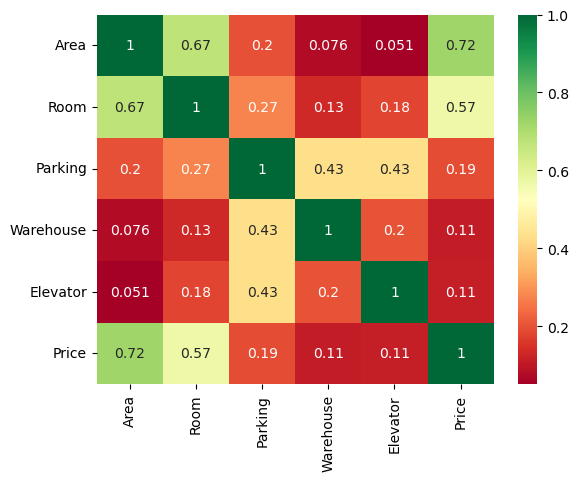

In [149]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn')


In [150]:
df3 = df['Address'].value_counts().copy()
df3 = df3[:8]
df3


Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                140
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Name: Address, dtype: int64

Text(0.5, 1.0, 'Number of flats in location')

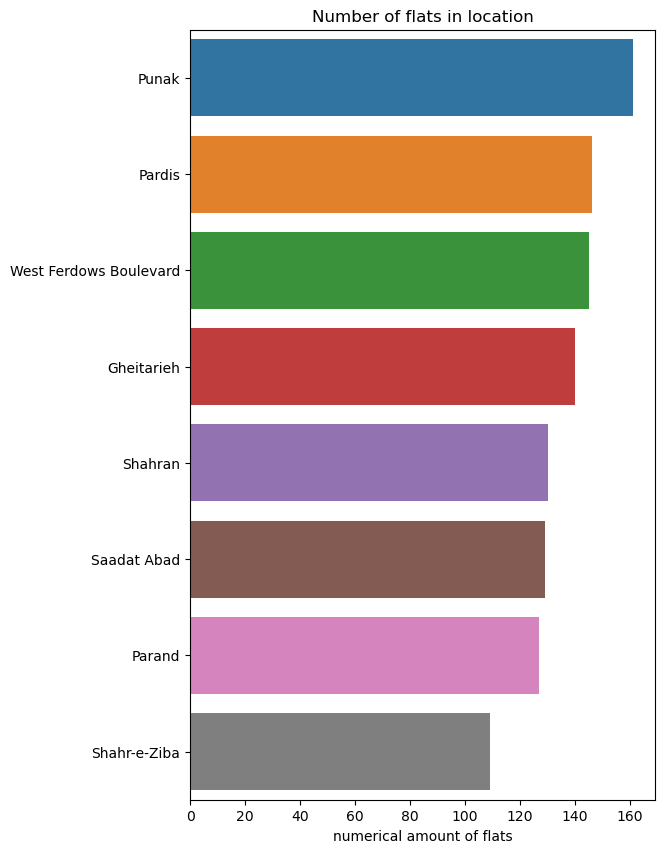

In [151]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')


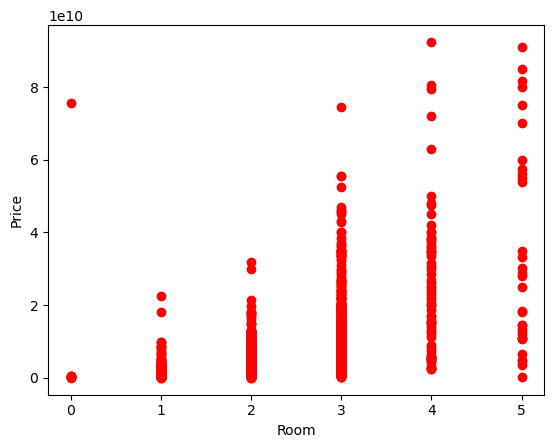

In [152]:
plt.scatter(df.Room, df.Price,  color='red')
plt.xlabel("Room")
plt.ylabel("Price")
plt.show()


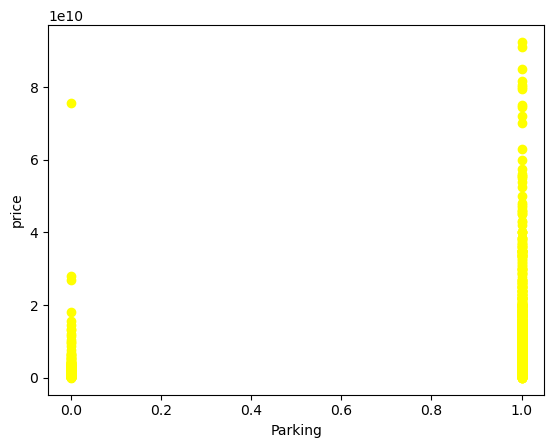

In [153]:
plt.scatter(df.Parking, df.Price,  color='yellow')
plt.xlabel("Parking")
plt.ylabel("price")
plt.show()


In [154]:
df.sort_values('Price',ascending=False)[['Address']].head(20)


,Address
1707,Zaferanieh
1810,Abazar
430,Lavasan
819,Ekhtiarieh
1332,Niavaran
1694,Zafar
3051,Dorous
3107,Tajrish
831,Mahmoudieh
2394,Aqdasieh


<Axes: xlabel='Price'>

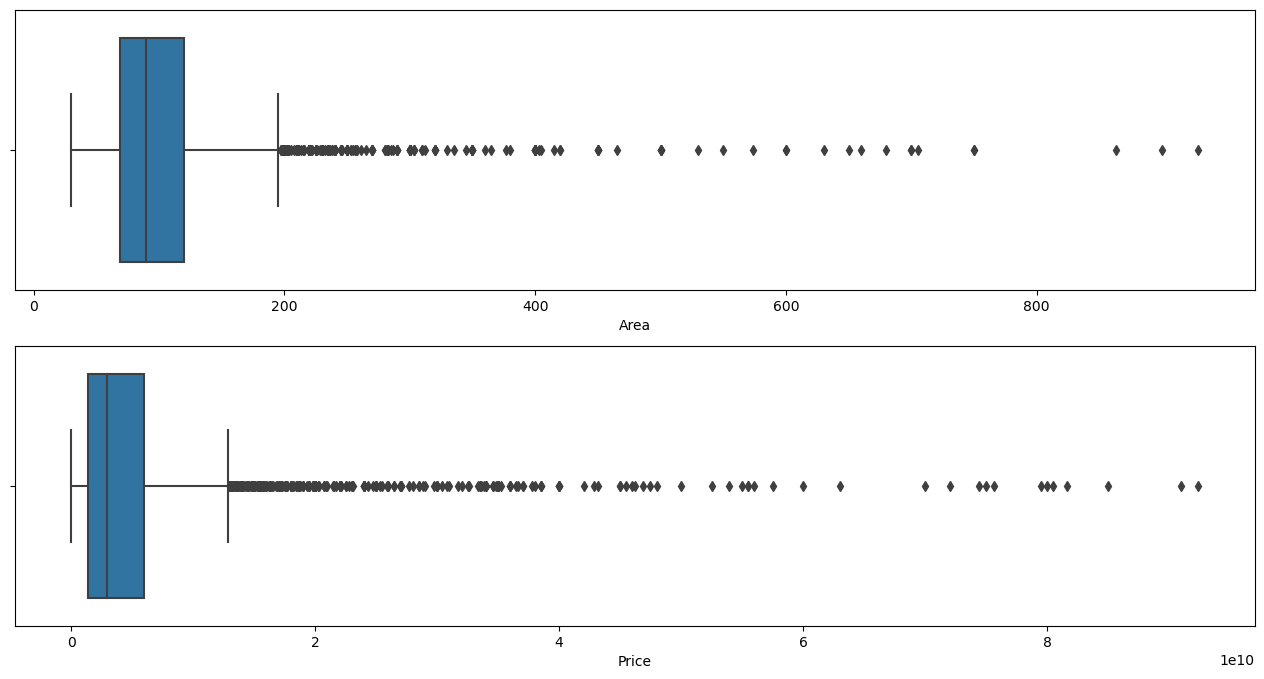

In [155]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['Area'])

plt.subplot(2,1,2)
sns.boxplot(x = df['Price'])


In [156]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['Area'])
lower_price, upper_price = lower_upper(df['Price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")


Lower limit for area: -7.50
Upper limit for area: 196.50
Lower limit for price: -5,451,875,000.0
Upper limit for price: 12,871,125,000.0


In [157]:
# from sklearn.model_selection import train_test_split
X = df_final.drop('Price',axis=1)
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model= LinearRegression()
model.fit(X_train , y_train )
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])



,Coeficient
Area,70813456
Room,345948997
Parking,-852827344
Warehouse,-142953896
Elevator,-71547100
...,...
Yousef Abad,1832475653
Zafar,2675211141
Zaferanieh,10195126348
Zargandeh,75105006


In [158]:
from sklearn import metrics
y_pred=model.predict(X_test)
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])


,Metrics
MAE,1972264179
MSE,16951998556154834944
RMSE,4117280481


Text(0, 0.5, 'Price')

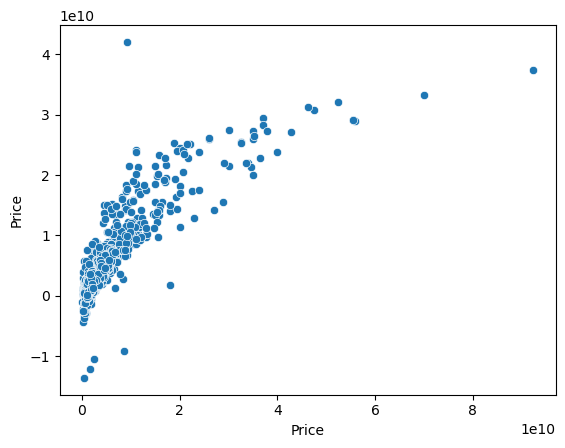

In [159]:
df['Price'].mean()
test_residuals=y_test-y_pred
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Price')
plt.ylabel('Price')


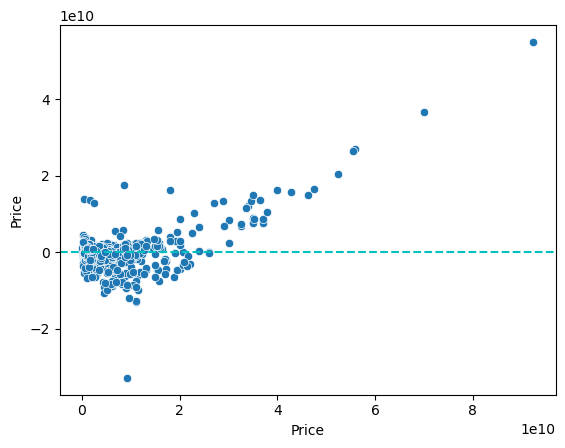

In [160]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='c', ls='--')


In [161]:
# from sklearn import linear_model

msk = np.random.rand (len (df)) < 0.8
train = df[msk]
test = df[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area' , 'Room' , 'Parking' , 'Warehouse' , 'Elevator']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)


Coefficients:  [[ 6.92741248e+07  1.94062127e+09 -1.38321362e+08  9.99897195e+08
   1.01999114e+09]]
Intercept:  [-7.60882174e+09]


In [162]:
y_hat= regr.predict(test[['Area' , 'Room' , 'Parking' , 'Warehouse' , 'Elevator']])
x = np.asanyarray(test[['Area' , 'Room' , 'Parking' , 'Warehouse' , 'Elevator']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))


Residual sum of squares: 23116193233024094208.00
Variance score: 0.52


c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [163]:
X = df_final.drop(columns = 'Price')
y = df_final['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")


shape of x train: (2760, 197)
shape of y train: (2760,)
shape of x test: (690, 197)
shape of y train: (690,)


In [164]:
lr = LinearRegression(n_jobs = -1)

parameters = {}

start = time.time()

grid = GridSearchCV(lr, 
                    param_grid = parameters, 
                    refit = True, 
                    cv = KFold(shuffle = True, random_state = 1), 
                    n_jobs = -1)
grid_fit = grid.fit(X_train, y_train)
y_train_pred = grid_fit.predict(X_train)
y_pred = grid_fit.predict(X_test)

lr_train_score = grid_fit.score(X_train, y_train)
lr_test_score = grid_fit.score(X_test, y_test)
lr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

model_name = str(lr).split('(')[0]

end = time.time()

print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
print("--" * 10)
print(f"(R2 score) in the training set is {lr_train_score:0.2%} for {model_name} model.")
print(f"(R2 score) in the testing set is {lr_test_score:0.2%} for {model_name} model.")
print(f"RMSE is {lr_RMSE:,} for {model_name} model.")
print("--" * 10)
print(f"Runtime of the program is: {end - start:0.2f}")


The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 73.89% for LinearRegression model.
(R2 score) in the testing set is 75.59% for LinearRegression model.
RMSE is 4,136,170,584.251215 for LinearRegression model.
--------------------
Runtime of the program is: 0.33


In [165]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

start = time.time()

grid = GridSearchCV(ridge, 
                    param_grid = param_ridge, 
                    refit = True, 
                    cv = KFold(shuffle = True, random_state = 1), 
                    n_jobs = -1)
grid_fit = grid.fit(X_train, y_train)
y_train_pred = grid_fit.predict(X_train)
y_pred = grid_fit.predict(X_test)

ridge_train_score = grid_fit.score(X_train, y_train)
ridge_test_score = grid_fit.score(X_test, y_test)
ridge_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

model_name = str(ridge).split('(')[0]

end = time.time()

print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
print("--" * 10)
print(f"(R2 score) in the training set is {ridge_train_score:0.2%} for {model_name} model.")
print(f"(R2 score) in the testing set is {ridge_test_score:0.2%} for {model_name} model.")
print(f"RMSE is {ridge_RMSE:,} for {model_name} model.")
print("--" * 10)
print(f"Runtime of the program is: {end - start:0.2f}")


The best parameters for Ridge model is: {'alpha': 1}
--------------------
(R2 score) in the training set is 73.09% for Ridge model.
(R2 score) in the testing set is 75.94% for Ridge model.
RMSE is 4,106,340,011.964132 for Ridge model.
--------------------
Runtime of the program is: 0.67


In [166]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

start = time.time()

grid = GridSearchCV(lasso, 
                    param_grid = param_lasso, 
                    refit = True, 
                    cv = KFold(shuffle = True, random_state = 1), 
                    n_jobs = -1)
grid_fit = grid.fit(X_train, y_train)
y_train_pred = grid_fit.predict(X_train)
y_pred = grid_fit.predict(X_test)

lasso_train_score = grid_fit.score(X_train, y_train)
lasso_test_score = grid_fit.score(X_test, y_test)
lasso_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

model_name = str(lasso).split('(')[0]

end = time.time()

print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
print("--" * 10)
print(f"(R2 score) in the training set is {lasso_train_score:0.2%} for {model_name} model.")
print(f"(R2 score) in the testing set is {lasso_test_score:0.2%} for {model_name} model.")
print(f"RMSE is {lasso_RMSE:,} for {model_name} model.")
print("--" * 10)
print(f"Runtime of the program is: {end - start:0.2f}")


The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 73.89% for Lasso model.
(R2 score) in the testing set is 75.55% for Lasso model.
RMSE is 4,140,043,072.0248804 for Lasso model.
--------------------
Runtime of the program is: 18.18


c:\Users\Mahdi-e\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.676e+22, tolerance: 1.794e+19
  model = cd_fast.enet_coordinate_descent(


In [167]:

dtr = DecisionTreeRegressor(random_state=1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
             'min_samples_leaf': [1, 2, 3]}
start = time.time()

grid = GridSearchCV(dtr,
                    param_grid=param_dtr,
                    refit=True,
                    cv=KFold(shuffle=True, random_state=1),
                    n_jobs=-1)


grid_fit = grid.fit(X_train, y_train)  
y_train_pred = grid_fit.predict(X_train)
y_pred = grid_fit.predict(X_test)  

dtr_train_score = grid_fit.score(X_train, y_train)
dtr_test_score = grid_fit.score(X_test, y_test)  
dtr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

model_name = str(dtr).split('(')[0]

end = time.time()

print(f"The best parameters for {model_name} model are: {grid_fit.best_params_}")
print("--" * 10)
print(f"(R2 score) in the training set is {dtr_train_score:0.2%} for {model_name} model.")
print(f"(R2 score) in the testing set is {dtr_test_score:0.2%} for {model_name} model.")
print(f"RMSE is {dtr_RMSE:,} for {model_name} model.")
print("--" * 10)
print(f"Runtime of the program is: {end - start:0.2f}")


The best parameters for DecisionTreeRegressor model are: {'min_samples_leaf': 3, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 85.74% for DecisionTreeRegressor model.
(R2 score) in the testing set is 77.06% for DecisionTreeRegressor model.
RMSE is 4,009,679,948.7864428 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 2.63


In [168]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}
start = time.time()

grid = GridSearchCV(rfr,
                    param_grid=param_rfr,
                    refit=True,
                    cv=KFold(shuffle=True, random_state=1),
                    n_jobs=-1)


grid_fit = grid.fit(X_train, y_train)  
y_pred = grid_fit.predict(X_test)  

rfr_train_score = grid_fit.score(X_train, y_train)
rfr_test_score = grid_fit.score(X_test, y_test)  
rfr_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

model_name = str(rfr).split('(')[0]

end = time.time()

print(f"The best parameters for {model_name} model are: {grid_fit.best_params_}")
print("--" * 10)
print(f"(R2 score) in the training set is {rfr_train_score:0.2%} for {model_name} model.")
print(f"(R2 score) in the testing set is {rfr_test_score:0.2%} for {model_name} model.")
print(f"RMSE is {rfr_RMSE :,} for {model_name} model.")
print("--" * 10)
print(f"Runtime of the program is: {end - start:0.2f}")


The best parameters for RandomForestRegressor model are: {'min_samples_leaf': 2, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 87.66% for RandomForestRegressor model.
(R2 score) in the testing set is 79.11% for RandomForestRegressor model.
RMSE is 3,826,250,288.117038 for RandomForestRegressor model.
--------------------
Runtime of the program is: 112.44


In [169]:
#خطا می دهد هر کاری میکنم
# knr = KNeighborsRegressor(n_jobs = -1)
# param_knr = {'n_neighbors': [5, 10, 15, 20],
#             'weights': ['uniform', 'distance']}


# start = time.time()

# grid = GridSearchCV(knr,
#                     param_grid=param_knr,
#                     refit=True,
#                     cv=KFold(shuffle=True, random_state=1),
#                     n_jobs=-1)

# # Fitting the model and making predictions
# grid_fit = grid.fit(X_train, y_train)  # Assuming X_train and y_train are your training data
# y_pred = grid_fit.predict(X_test)  # Assuming X_test is your testing data

# train_score = grid_fit.score(X_train, y_train)
# test_score = grid_fit.score(X_test, y_test)  # Assuming y_test is the actual target values for X_test
# RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# model_name = str(knr).split('(')[0]

# end = time.time()

# print(f"The best parameters for {model_name} model are: {grid_fit.best_params_}")
# print("--" * 10)
# print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
# print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
# print(f"RMSE is {RMSE:,} for {model_name} model.")
# print("--" * 10)
# print(f"Runtime of the program is: {end - start:0.2f}")


In [171]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, dtr_train_score, rfr_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, dtr_test_score, rfr_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, dtr_RMSE, rfr_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor', 'RandomForestRegressor'])
models_score


,Training score,Testing score,RMSE
LinearRegression,1,1,4136170584
Ridge,1,1,4106340012
Lasso,1,1,4140043072
DecisionTreeRegressor,1,1,4009679949
RandomForestRegressor,1,1,3826250288


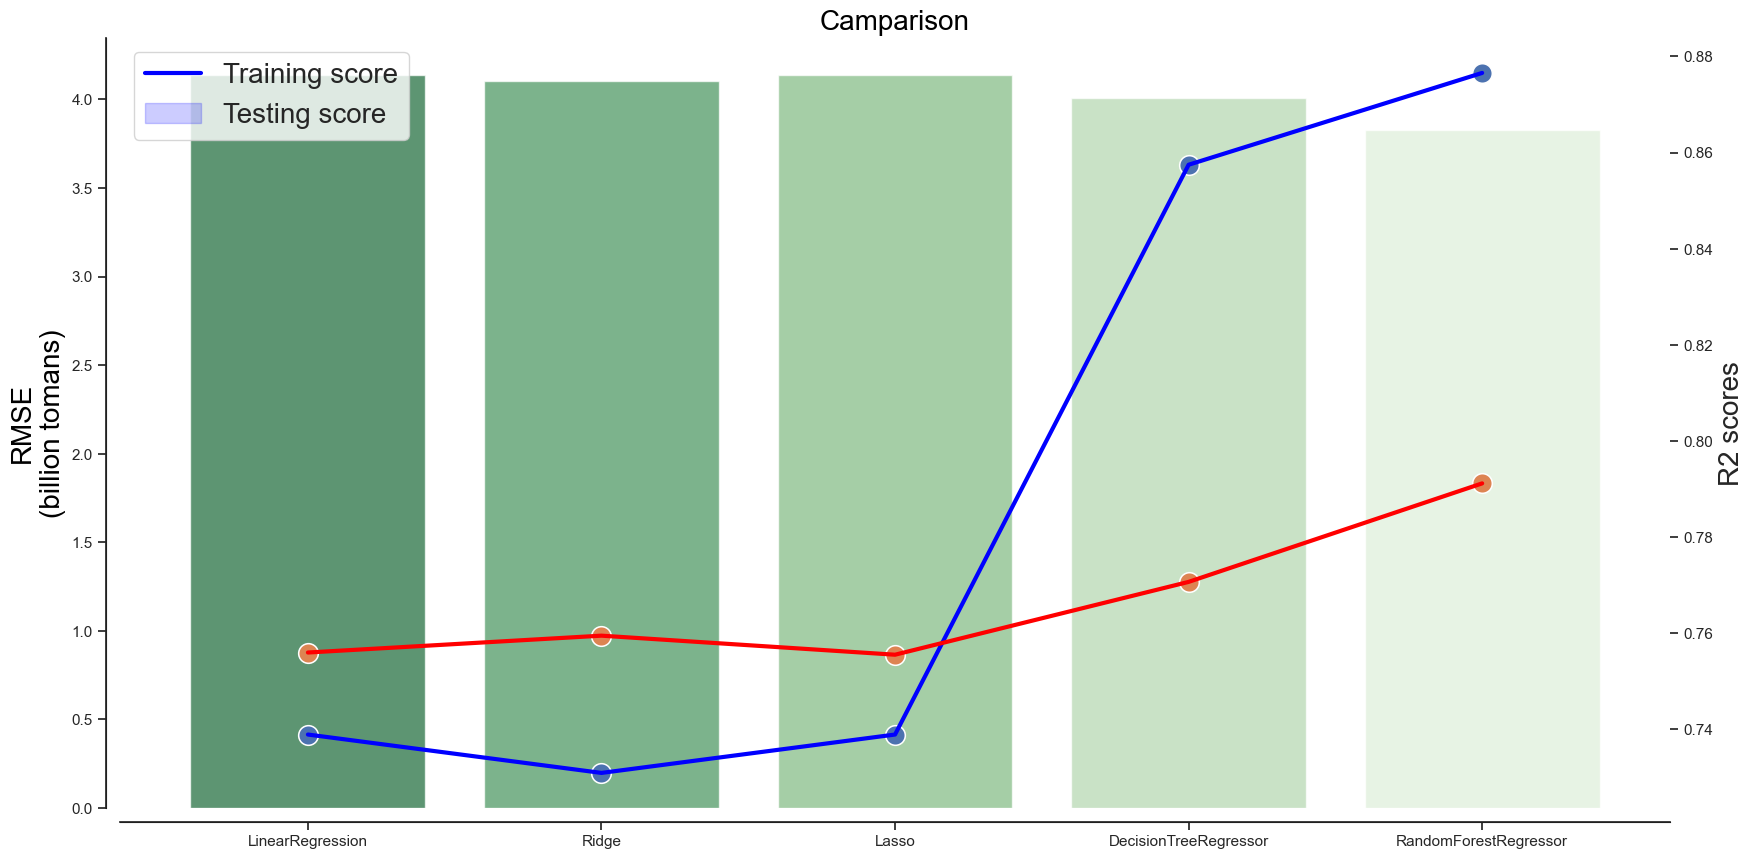

In [172]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()
